### Fourier transformation 

In the first part, we will implement the Fourier transformation and apply it to a simple signal.

**Task 1**: Implement the Fourier mapping. The function should take a signal as input and return the Fourier mapping outputs. 

Recall that Fourier mapping coefficients are defined as follows:

\begin{align*}
v_k &= 
\begin{bmatrix}
\exp(-i 2\pi  k \frac{1}{d}) \\
\exp(-i 2\pi k \frac{2}{d}) \\
\vdots \\
\exp(-i 2\pi  k \frac{d}{d}) \\
\end{bmatrix}
\end{align*}

and the Fourier mapping is defined as follows:

\begin{align*}
F(x) = 
\begin{bmatrix}
|\langle v_1, x \rangle | \\
|\langle v_2, x \rangle | \\
\vdots \\
|\langle v_d, x \rangle | \\
\end{bmatrix}
\end{align*}

where $d$ is the length of the signal.

In [1]:
import numpy as np

def fourier_mapping(x):
    d = len(x)
    F = np.zeros((d, d), dtype = complex)
    for k in range(d):
        for n in range(d):
            F[n, k] =  np.exp(-2j * np.pi * k * n / d)
    return np.abs(F.dot(x))


x = np.array([1, 2, 3, 4])
print(f"Fourier mapping of {x}: {fourier_mapping(x)}")

assert np.allclose(fourier_mapping(x), np.abs(np.fft.fft(x)))


Fourier mapping of [1 2 3 4]: [10.          2.82842712  2.          2.82842712]


**Task 2**: Generate a signal with two sinusoidal components and a constant offset. 
 
 Given $A_1, f_1$ and $A_2, f_2$ as the amplitudes and frequencies of the two sinusoidal components with constant offset $C$, the signal is defined as follows:

\begin{align*}
s(t) = A_1 \sin(2\pi f_1 t) + A_2 \sin(2\pi f_2 t) + C
\end{align*}



Apply the Fourier transformation to the signal and plot the absolute value of the Fourier coefficients. What do you observe?

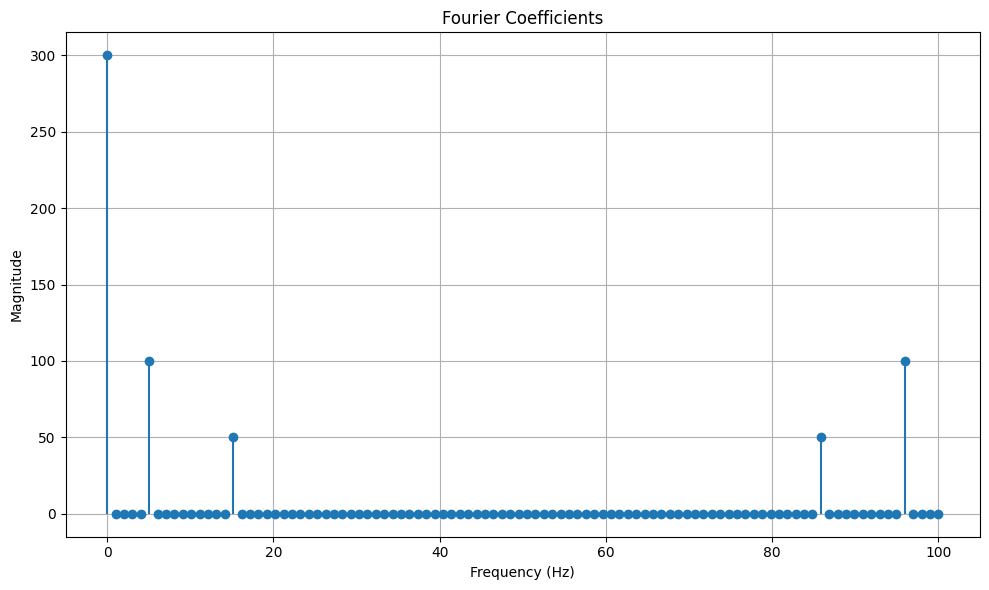

In [2]:
import matplotlib.pyplot as plt

# Define the signal parameters
A1, f1 = 2, 5  # Amplitude and frequency for the first sinusoid
A2, f2 = 1, 15  # Amplitude and frequency for the second sinusoid
C = 3  # Constant offset
fs = 100  # Sampling frequency
T = 1  # Duration in seconds
t = np.linspace(0, T, fs * T, endpoint=False)  # Time vector

# Generate the signal
s = A1 * np.sin(2 * np.pi * f1 * t) + A2 * np.sin(2 * np.pi * f2 * t) + C

# Compute the Fourier transform of the signal
S = fourier_mapping(s) 

# Compute the frequencies corresponding to the Fourier coefficients
frequencies = np.linspace(0, fs, len(s), endpoint=True)

# Plot the absolute value of the Fourier coefficients
plt.figure(figsize=(10, 6))
plt.stem(frequencies, S, basefmt=" ")
plt.title("Fourier Coefficients")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.tight_layout()
plt.show()

# TAKEAWAY: Fourier mapping captures the frequency components of the input signal

**Task 3**: Verify numerically that the Fourier mapping is translation invariant. 

In [3]:
def translation(x, s):
    d = len(x)
    coeff = (np.arange(d) + s) % d
    return x[coeff]

x = np.array([1, 2, 3, 4])
s = 2
print(f"Translation of {x} by {s}: {translation(x, s)}")

# Verify that the Fourier mapping is independent of translation
assert np.allclose(fourier_mapping(x), fourier_mapping(translation(x, s)))

Translation of [1 2 3 4] by 2: [3 4 1 2]


### Processing images with convolution and pooling

In the second part, we will implement convolution and pooling and apply it to an image.

**Task 4**: Implement the convolution operation. The function should take an 2-D image and a kernel as input and return the convolved image. The kernel should be a square matrix. 

In [4]:
def conv(image, kernel):
    x, y = image.shape
    kx, ky = kernel.shape
    output = np.zeros((x - kx + 1, y - ky + 1))
    for i in range(x - kx + 1):
        for j in range(y - ky + 1):
            output[i, j] = np.sum(image[i:i+kx, j:j+ky] * kernel)
    return output

image = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
kernel = np.array([[1, 1], [1, 1]])

print(f"Image: \n {image}")
print(f"Kernel: \n {kernel}")
print(f"Convolution: \n {conv(image, kernel)}")

assert np.allclose(conv(image, kernel), np.array([[14., 18., 22.]]))

Image: 
 [[1 2 3 4]
 [5 6 7 8]]
Kernel: 
 [[1 1]
 [1 1]]
Convolution: 
 [[14. 18. 22.]]


**Task 5**: Use the above implementation of convolution function to construct a feature that tells us whether there is a plus sign in the image. Use max pooling to reduce the size of the feature map. Plus sign is defined as follows:

\begin{align*}
\begin{bmatrix}
0 & 1 & 0 \\
1 & 1 & 1 \\
0 & 1 & 0 \\
\end{bmatrix}
\end{align*}


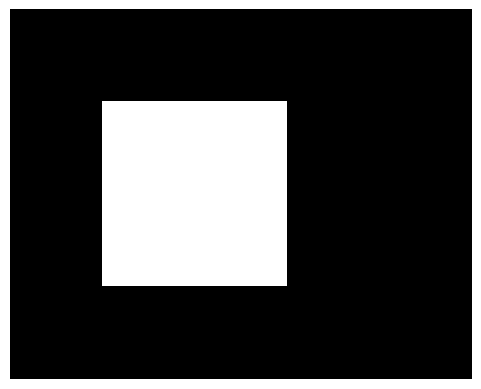

Image 1 does not contain a plus.


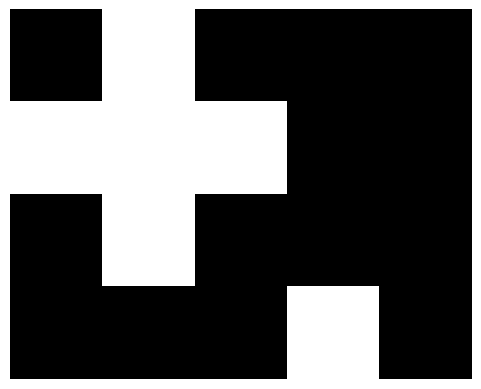

Image 2 contains a plus.


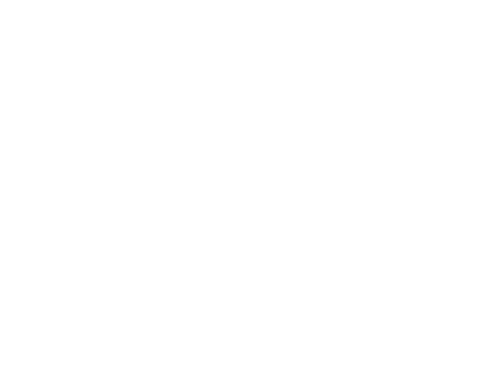

Image 3 does not contain a plus.


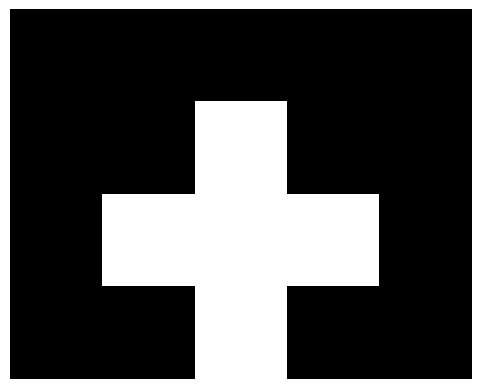

Image 4 contains a plus.


In [5]:
img_1 = np.array(
    [[0, 0, 0, 0, 0],
     [0, 1, 1, 0, 0],
     [0, 1, 1, 0, 0],
     [0, 0, 0, 0, 0]]
)

img_2 = np.array(
    [[0, 1, 0, 0, 0],
     [1, 1, 1, 0, 0],
     [0, 1, 0, 0, 0],
     [0, 0, 0, 1, 0]]
)

img_3 = np.array(
    [[1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1]]
)

img_4 = np.array(
    [[0, 0, 0, 0, 0],
     [0, 0, 1, 0, 0],
     [0, 1, 1, 1, 0],
     [0, 0, 1, 0, 0]]
)

images = [img_1, img_2, img_3, img_4]


def contains_plus(image):
    kernel = np.array([[-1, 1, -1], [1, 1, 1], [-1, 1, -1]])
    return np.max(conv(image, kernel)) == 5


for i, img in enumerate(images):
    plt.imshow(img, cmap='gray', vmin=0, vmax=1)
    plt.axis("off")
    plt.show()
    if contains_plus(img):
        print(f"Image {i + 1} contains a plus.")
    else:
        print(f"Image {i + 1} does not contain a plus.")

### Nonlinear Features

In the last part of the lab, we will look into the different ways of constructing nonlinear features.

We consider the following dataset (similar to Example 84):

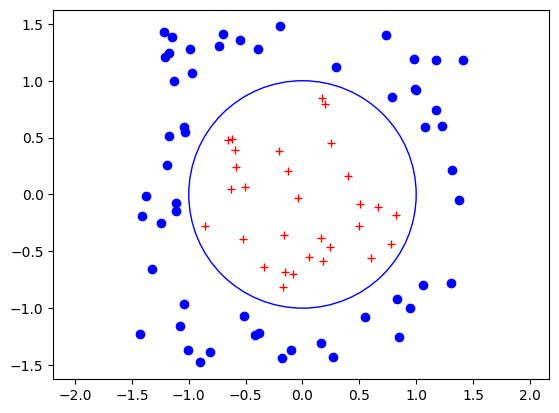

In [6]:
n = 100
random_seed = 42
rng = np.random.default_rng(random_seed)

X = rng.uniform(-1.5, 1.5, (n, 2))
diameter = np.sqrt(np.sum(X ** 2, axis=1))

X = X[(diameter <= 0.9) + (diameter >= 1.1)]
diameter = np.sqrt(np.sum(X ** 2, axis=1))
y = np.ones(len(X))
y[diameter >= 1.1] = -1

plt.plot(X[y == -1, 0], X[y == -1, 1], "o", color="b")
plt.plot(X[y == 1, 0], X[y == 1, 1], "+", color="r")
# plot separating circle
circle = plt.Circle((0, 0), 1, color="b", fill=False)
plt.gca().add_patch(circle)
plt.axis("equal")
plt.show()

**Task 6**: Use second order polynomial features to construct a nonlinear feature map. Then use the perceptron algorithm to find a linear classifier in the new feature space. Plot the data points and the decision boundary.

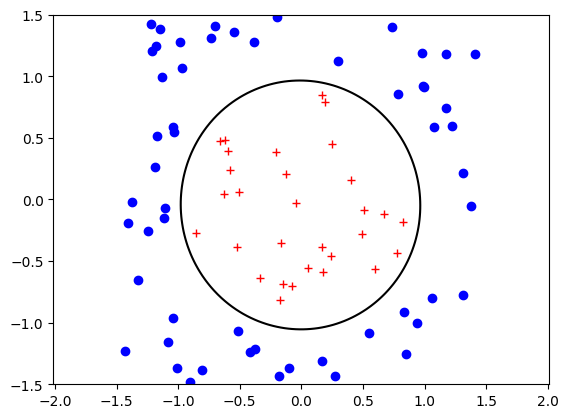

Final norm of weights: 10.56


In [7]:
def second_order_polynomial_features(X):
    return np.hstack((
        0 * X[:, 0:1] + 1, X,  X[:, 0:1] * X[:, 1:],
        X[:, 0:1] ** 2, X[:, 1:] ** 2))

X_poly = second_order_polynomial_features(X)


# fix random seed
random_seed = 42
rng = np.random.default_rng(random_seed)

w = np.zeros(6)

while True: 
    # compute the predictions
    y_pred = y * X_poly.dot(w)
    if np.all(y_pred >= 1):
        break
    # pick a random example
    i = rng.integers(len(X))
    # update the weights
    if y_pred[i] < 1:
        w += y[i] * X_poly[i]

# plot the data points
plt.plot(X[y == -1, 0], X[y == -1, 1], "o", color="b")
plt.plot(X[y == 1, 0], X[y == 1, 1], "+", color="r")
# plot polynomial boundary
x = np.linspace(-1.5, 1.5, 100)
xx, yy = np.meshgrid(x, x)
Z = second_order_polynomial_features(np.c_[xx.ravel(), yy.ravel()]).dot(w)
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0], colors="k")
plt.axis("equal")
plt.show()

print(f"Final norm of weights: {np.linalg.norm(w):.2f}")

**Task 7**: Use the kernel trick to construct a nonlinear feature map. Then solve the linear equation to find a classifier in the new feature space. Plot the data points and the decision boundary.

Exponential kernel with gamma = 1
Norm of final weights: 2241.3458198668322


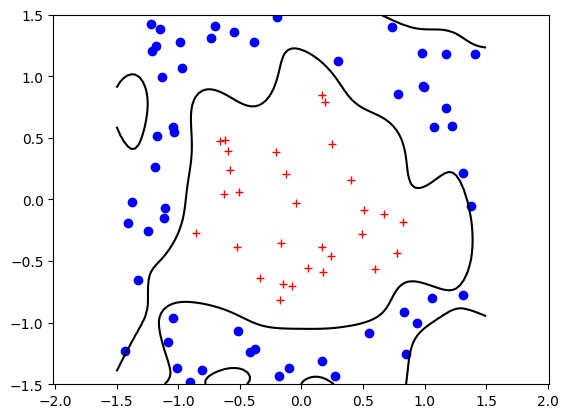

Exponential kernel with gamma = 10
Norm of final weights: 6.004128190134652


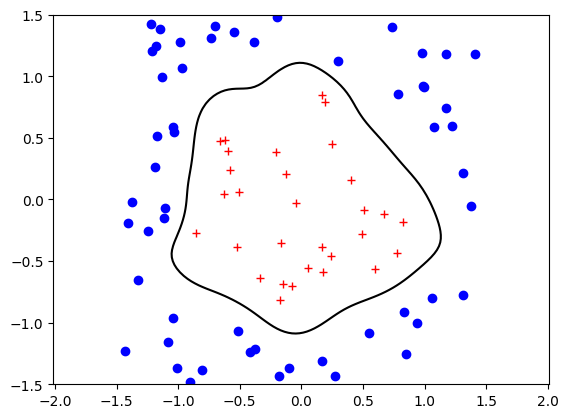

Exponential kernel with gamma = 100
Norm of final weights: 8.37627233719508


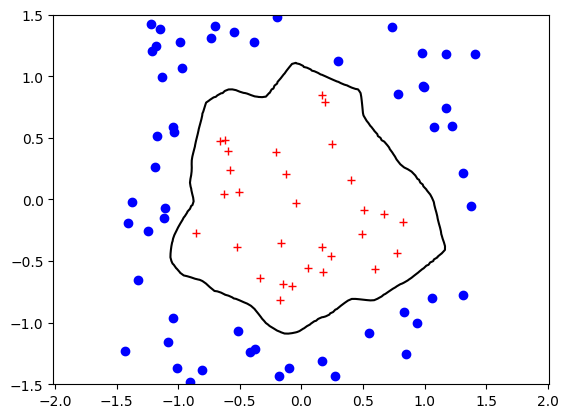

In [8]:
def exponential_kernel(x, y, gamma):
    return np.exp(-gamma * np.sum((x - y) ** 2))

def kernel_matrix(X, kernel, **kwargs):
    n = len(X)
    K = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            K[i, j] = kernel(X[i], X[j], **kwargs)
    return K

def predict_value(x, X_data, alpha, kernel, **kwargs):
    n = len(X_data)
    y_pred = 0.
    for i in range(n):
        y_pred += alpha[i] * kernel(X_data[i], x, **kwargs)
    return y_pred

def predict(X, X_data, alpha, kernel, **kwargs):
    n = len(X)
    y_pred = np.zeros(n)
    for i in range(n):
        y_pred[i] = predict_value(X[i], X_data, alpha, kernel, **kwargs)
    return y_pred

for gamma in [1, 10, 100]:

    print(f"Exponential kernel with gamma = {gamma}")

    K_expontential = kernel_matrix(X, exponential_kernel, gamma=gamma)
    alpha = np.linalg.solve(K_expontential, y)

    print(f"Norm of final weights: {np.sqrt(alpha.dot(K_expontential).dot(alpha))}")

    # plot the data points
    plt.plot(X[y == -1, 0], X[y == -1, 1], "o", color="b")
    plt.plot(X[y == 1, 0], X[y == 1, 1], "+", color="r")
    # plot polynomial boundary
    x = np.linspace(-1.5, 1.5, 100)
    xx, yy = np.meshgrid(x, x)
    Z = predict(np.c_[xx.ravel(), yy.ravel()], X, alpha, exponential_kernel, gamma=gamma)
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, levels=[0], colors="k")
    plt.axis("equal")
    plt.show()

    

**Task 8**: Verify numerically that summing up kernel functions is equal to concatentating the corresponding feature lifts and multiplying the kernel functions is equal to taking the Kronecker product of the feature lifts. Can you give a mathematical proof of this fact?

In [9]:
def first_order_polynomial_features(X):
    return np.hstack((
        0 * X[:, 0:1] + 1, X))

def second_order_polynomial_features(X):
    return np.hstack((
        X[:, 0:1] * X[:, 1:],
        X[:, 0:1] ** 2, X[:, 1:] ** 2))

def kernel_matrix(X_lift):
    return X_lift.dot(X_lift.T)

X_first = first_order_polynomial_features(X)
X_second = second_order_polynomial_features(X)

X_concat = np.hstack((X_first, X_second))
X_kronecker = np.array([
    np.kron(X_first[i], X_second[i])
    for i in range(len(X))
])

# concatentation as summation of kernel functions
assert np.allclose(kernel_matrix(X_concat), kernel_matrix(X_first) + kernel_matrix(X_second))

# kronecker product as product of kernel functions
assert np.allclose(kernel_matrix(X_kronecker), kernel_matrix(X_first) * kernel_matrix(X_second))

**Task 9**: Construct the simple neural network as defined on Slide 288. Use ReLU as the activation function. Initialize model parameters as random numbers using normal distribution with zero mean and variance one.

In [10]:
random_seed = 42
rng = np.random.default_rng(random_seed)

input_dim = 2
inner_dim = 10

# initialize the weights
A = rng.normal(0, 1, (inner_dim, input_dim))
b = rng.normal(0, 1, inner_dim)
w = rng.normal(0, 1, inner_dim)

def relu(x):
    return np.maximum(x, 0)

def neural_network(x):
    return w.T.dot(relu(A.dot(x)))

x = X[0]

# compute a single prediction on randomly initialized weights
print(f"Input {x} --> Output {neural_network(x)}")

Input [ 0.82186815 -0.18336468] --> Output 0.9999215140592448


**Task 10**: Verify numerically Example 111 tha the connection between the Gaussian kernel and random features generated as $b(x, \nu) = [\cos(x^\top \nu), \sin(x^\top \nu)]^\top$, where $p(\nu) = \mathcal{N}(0, \gamma I)$, i.e., show that the kernel function induced by random feature lift converges to the Gaussian kernel function as we increase its dimensionality (sample more features).

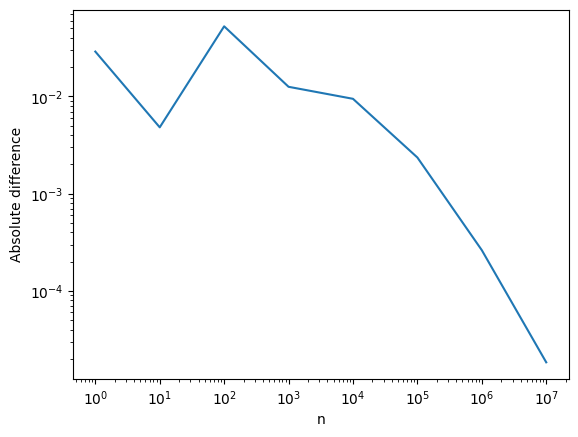

In [11]:
def Gaussian_kernel(x, y, gamma):
    return np.exp(- gamma / 2 * np.sum((x - y) ** 2))


def random_features(x, gamma, n):
    # fix random seed
    random_seed = 42
    rng = np.random.default_rng(random_seed)

    d = len(x)
    nu = rng.normal(0, gamma, (n, d))
    random_features = np.concatenate((np.cos(nu.dot(x)), np.sin(nu.dot(x))), axis=0)
    
    return random_features


n_s = [1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7]
x = X[0]
y = X[1]
gamma = 1

diff = []

for n in n_s:
    n = int(n)
    gauss_kernel_value = Gaussian_kernel(x, y, gamma)
    random_features_value = random_features(x, gamma, n).dot(random_features(y, gamma, n)) / n
    diff.append(np.abs(gauss_kernel_value - random_features_value))

plt.plot(n_s, diff)
plt.xlabel("n")
plt.ylabel("Absolute difference")
plt.xscale("log")
plt.yscale("log")
plt.show()

